In [4]:
import numpy as np
pi = np.pi

# advect1-t

Advects BC

# advect2-t

In [2]:
v = 0.5
L = 100

q = 1

rhoi = 100

rhoo = rhoi + 1/v * q * L
rhoo

300.0

# advec3-t

Advects BC

# advec4-t

In [1]:
rho = 1e-2
cp = 2e3
v = 0.5

L = 100
q = 1

Ti = 930

To = Ti + 1/rho/cp/v * q * L
To

940.0

# advec5-t

In [3]:
rho = 1e-2
cp = 2e3
v = 0.5

L = 100
dx = 2  # \Delta_x

Ti = 930
q0 = 10

To = Ti + 1/rho/cp/v * 1/dx * q0 * 2 * L/pi
To

961.830988618379

# advec6-t

based on PMR600

[1]: Tak, Kim, Lee. Numerical investigation of a heat transfer within the prismatic fuel assembly
of a very high temperature reactor. 2008. [link](https://www.sciencedirect.com/science/article/pii/S0306454908001114)

[2]: Tak, Lee, Kim, Lim, and Noh. Development of a Core Thermo-Fluid Analysis Code for Prismatic Gas Cooled Reactors. 2014. [link](https://www.sciencedirect.com/science/article/pii/S1738573315301042).

$\dot{m}_C = \dot{m}_A \left( 1 - \frac{1.1}{100}\right) \frac{\pi R_C^2}{102 \pi R_C^2 + 6 \pi R_c^2} $

$ v = \frac{\dot{m}_C}{\rho \pi R_C^2} $

* $\dot{m}_C$ : mass flow in a cooling channel
* $\dot{m}_A$ : mass flow in a fuel assembly [1]
* 1.1% is the percentage of the total mass flow that goes into the bypass channel
* 102: number of large cooling channels in one assembly
* 6: number of small cooling channels in one assembly
* $R_C$: Radius of a large cooling channel
* $R_c$: Radius of a small cooling channel
* $v$ : velocity of the coolant at the entrance of the channel

In [19]:
L = 793  # [cm]
rlc = 0.794  # [cm]
rsc = 0.635  # [cm]
rf = 0.635  # [cm]

rho = 4.368  # [kg/m3] 7 MPa, 490 C [2]
rho /= 1e6  # [kg/cm3]

cp = 5.188  # [J/g/K] 7 MPa, 490 C [2]
cp *= 1e3  # [J/kg/K]

ma = 2.46  # kg/s Assembly flow rate [1]
ma = ma*(1-1.1/100)  # don't account for the bypass flow
Ac = 102 * np.pi * rlc**2 + 6 * np.pi * rsc**2  # cm^2
mlc = ma/Ac * np.pi * rlc**2  # [kg/s] mass flow in a large coolant channel
v = mlc/(np.pi * rlc**2)/rho
print(v, 'cm/s')
# I got somewhere that the inlet v in the MHTGR350 is 28.5 m/s, so this makes sense.
# According to another source, the max velocity in HTGRs is 60 m/s.

2657.1616831428432 cm/s


$ Q = 2 \frac{P}{N_{FC} N_{F}} $

$ q = \frac{Q}{2 \pi R_C L}$

* $P$: Reactor thermal power
* $N_{FC}$: number of fuel columns = 102
* $N_{F}$: number of fuel channels/assembly = 210
* 2: number of fuel channels refrigerated by one cooling channel (see figure below)
* $q$: (q''): heat flux
* $R_C$: Large cooling channel radius
* $L$: Length of the channel

$ q \times 2 \pi R_C L = \int^L_0 q_0 sin(\frac{\pi}{L}y) dy \times 2 \pi R_C $

$ q \times L = q_0 \times 2 \frac{L}{\pi}$

$ q_0 = q \frac{\pi}{2}$


<div>
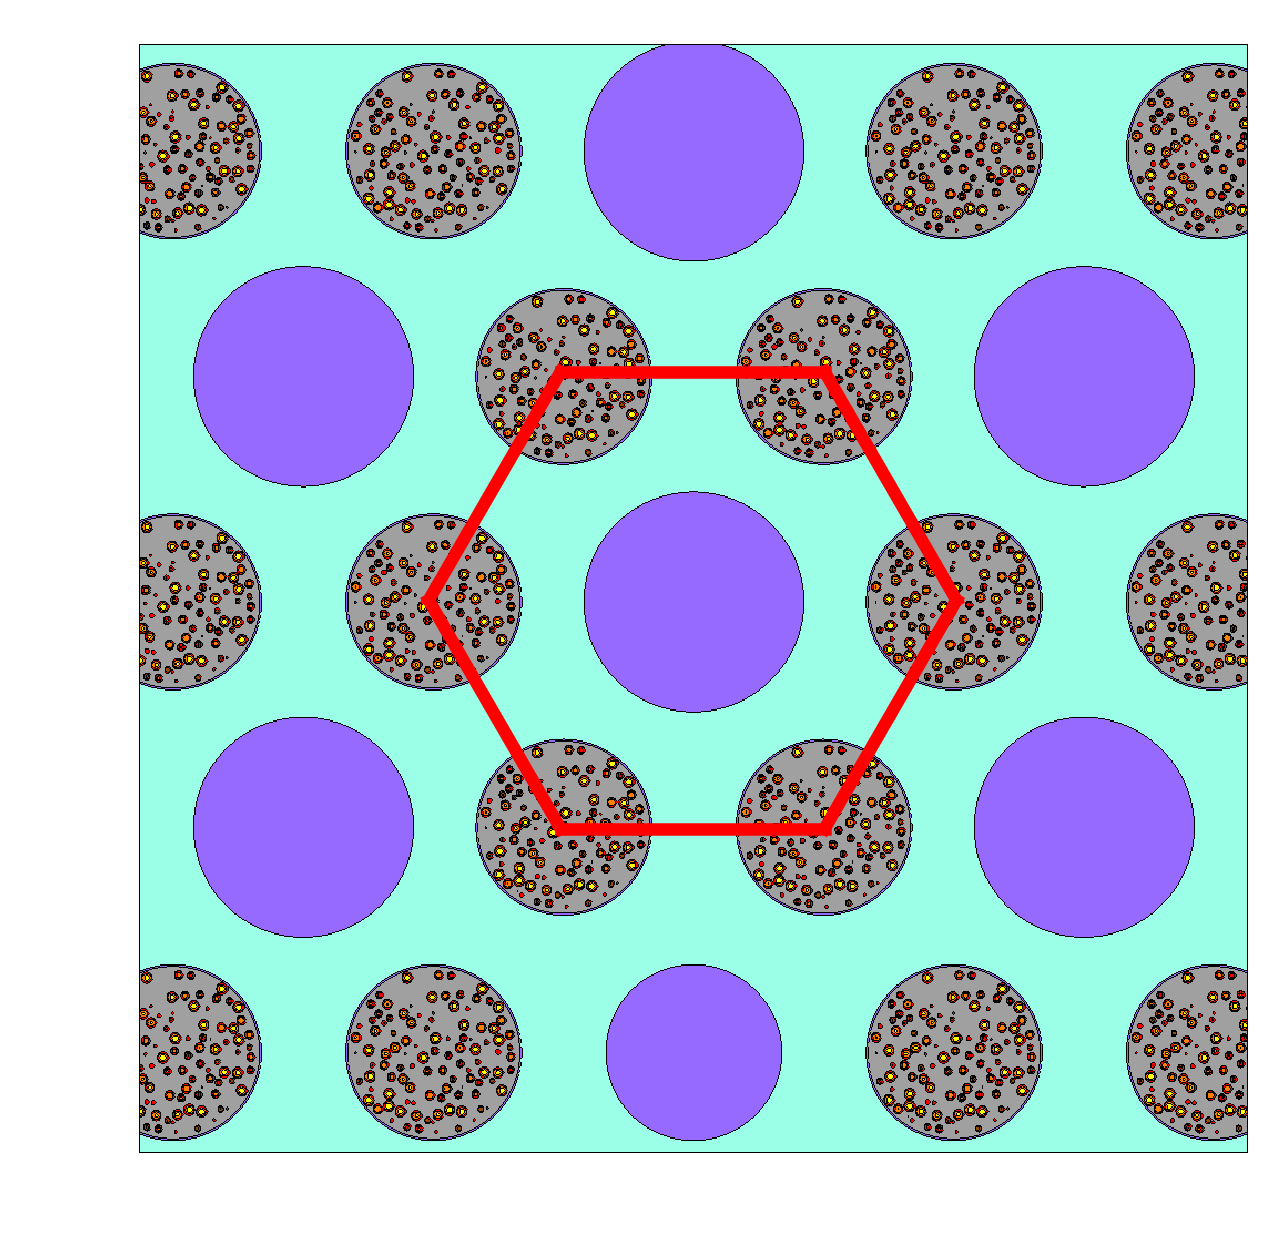
</div>

In [36]:
Ti = 490  # [C]

P = 600e6  # [W]
nfc = 102  # number of fuel columns

vf = nfc * 210 * pi * 0.635**2 * 793
Q = P/vf  # [W/cm3] q'''

# two channels send their heat to a cooling channel
Q = P / (nfc * 210 ) * 2
print('Heat that goes into the coolant channel', Q, 'W')

q = Q / (793 * 2 * pi * rlc)
print(q, 'W/cm2')  # q'' is constant on y

q0 = q * pi/2
print(q0, 'W/cm2')  # q'' * L = q0 * 2 * L/pi

Heat that goes into the coolant channel 56022.40896358543 W
14.160814098281763 W/cm2
22.24375477000638 W/cm2


In [37]:
Ti = 490  # [C]

To = Ti + 1/rho/cp/v * 1/pi/rlc**2 * q0 * 2 * L/pi * 2 * pi * rlc
To

959.7538235345764